### Udacity - CRISP-DM Project - A closer look into the data of Seattle’s Airbnb market
BUSINESS UNDERSTANDING
The Seattle AirBnB Dataset contains data about AirBnB listings in Seattle, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the following business questions.

#### Pricing Trends

Q1 Is there a price variation by neighbourhood?

#### Sentiment Analysis of Reviews
How can we categorize reviews based on sentiments?
Are reviews more positive for higher priced neighbourhoods?

#### Price Prediction

Can we predict price for a given listing? What factors of the listing correlate best for predicting price?

In [80]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
import nltk
nltk.download
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score

## Data Gathering

In [2]:
#reading data from csv files

reviewsdf = pd.read_csv('reviews.csv')
listingsdf = pd.read_csv('listings.csv')
calendardf = pd.read_csv('calendar.csv')

In [3]:
reviewsdf.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
listingsdf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
calendardf.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Assessing data

### Understanding the relationship between databases

In [6]:
reviewsdf[(reviewsdf['listing_id']==241032)].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
46381,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
46382,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
46383,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
46384,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
46385,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [7]:
listingsdf[(listingsdf['id']==241032)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [8]:
calendardf[(calendardf['listing_id']==241032)].head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Database Understanding:

1. listings.csv - A table containing listings of all Airbnb stays in Seattle with description (92 columns)
2. calendar.csv - table containing availability and price of each listing
3. reviews.csv - Reviews for listings by travellers 

### Assessing/Cleaning Reviews Data

In [9]:
reviewsdf.shape

(84849, 6)

In [10]:
reviewsdf.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64

### Comments

It seems the dataset is clean with only null(missing) values reported in comments column. We can remove the columns as they do not add any value without comments. 

In [11]:
reviewsdf=reviewsdf[~reviewsdf['comments'].isnull()]

In [12]:
reviewsdf.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

### Assessing/Cleaning Listings Data

In [13]:
listingsdf.shape

(3818, 92)

In [14]:
listingsdf.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

### Findings

THere are substantial number of columns with Null/missing information, but it is not immeadiately clear if they will lead to error in analysis. Also, it is not clear as to what can be replaced for missing values

#### Let us now analyse some of the categorical features such as  neighbourhood_group_cleansed,host_response_time,property_type,reviews_per_month

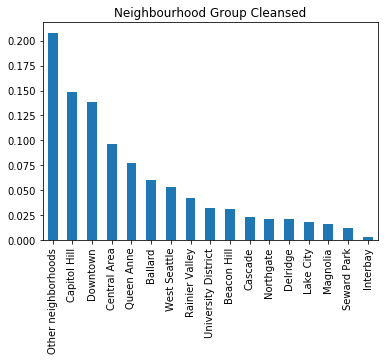

In [15]:
#explore neighbourhood_group_cleansed

neigh_vals = listingsdf['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/listingsdf.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

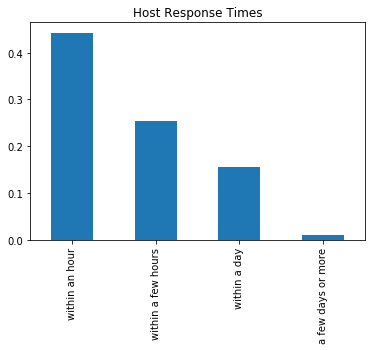

In [16]:
#explore host_response_time

host_response_vals = listingsdf['host_response_time'].value_counts()
(host_response_vals/listingsdf.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

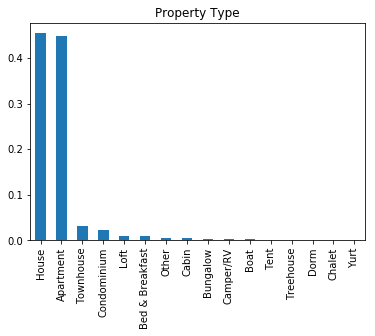

In [17]:
#explore property_type

property_type_vals = listingsdf['property_type'].value_counts()
(property_type_vals/listingsdf.shape[0]).plot(kind="bar");
plt.title("Property Type");

### Findings

1. "other neighbourhoods" constitute a major chunk of neighbourhood group classification. It might be useful for the users to have as many listings classified as possible
2. host-response-times are usually often within an hour and mostly within a day which is a good sign of responsivity
3. Property types are mostly houses and apartments 

### Assessing/Cleaning Calendar Data

In [18]:
calendardf.shape

(1393570, 4)

In [19]:
calendardf[(calendardf['available']=='t')].isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

### Findings

This data set seems to be clean as there are price values for all calendar days where listings are available

## Context and Questions for Evaluation

Q1. Is there a price variation by neighbourhood?
Q2. Does neighbourhoods with high price have higher positive perception
Q3. What factors drive price and predict a price for a listing

## Q1 Is there a price variation by neighbourhood?

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

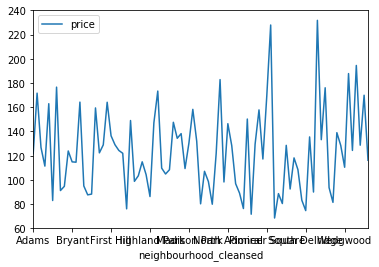

In [20]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
listingsdf['price'] = listingsdf['price'].replace('[\$,]', '', regex=True).astype(float)

print(listingsdf.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
listingsdf.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

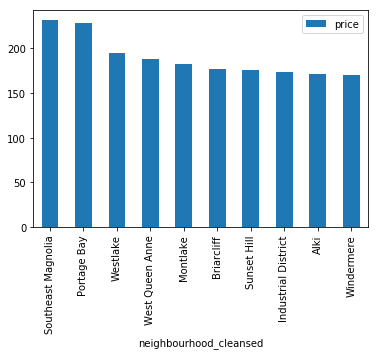

In [21]:
# Plot top 10 neighborhoods
top10_neigh = listingsdf.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head(10)
top10_neigh.plot(kind='bar');


## Finding :

Southeast Magnolia, Portage Bay and Westlake are top neighbouthoods on basis of average price.

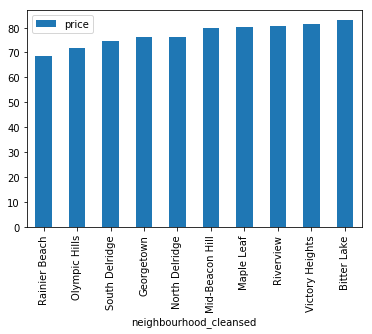

In [22]:
# Plot bottom 10 neighborhoods
top10_neigh = listingsdf.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=True).head(10)
top10_neigh.plot(kind='bar');

## Finding :

Rainier Beach, Olympic Hills and South Delridge are cheapest on basis of average price.

## Q2 Is the Perception of a property dependent on Price?

In [23]:
# Create a smaller data frame with just listing ids and review comments
df_comments = reviewsdf[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [24]:
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = listingsdf.loc[listingsdf['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

In [25]:
# Apply get_neighborhood function to the listing ids
df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
df_comments.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [26]:
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:

# SentimentIntensityAnalyzer reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [28]:
# Group by neighbourhood and average the polarity scores
neigh_polarity = df_comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)


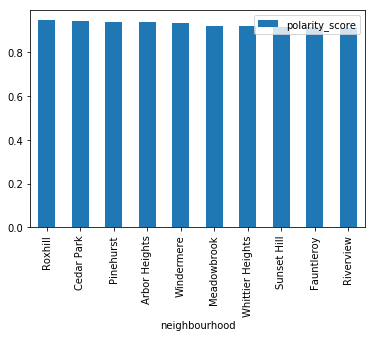

In [29]:
# Visualize top neighborhoods based on reviews
neigh_polarity.head(10).plot(kind='bar');

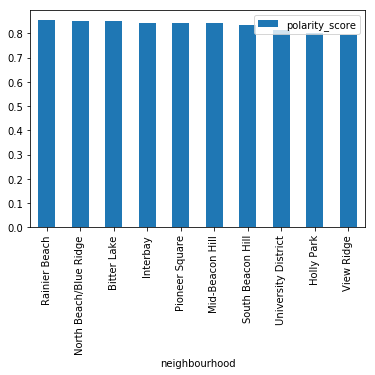

In [30]:
neigh_polarity.tail(10).plot(kind='bar');


In [31]:
neigh_polarity.sort_values

<bound method DataFrame.sort_values of                            polarity_score
neighbourhood                            
Roxhill                          0.946186
Cedar Park                       0.940441
Pinehurst                        0.939010
Arbor Heights                    0.936922
Windermere                       0.935733
Meadowbrook                      0.919805
Whittier Heights                 0.918768
Sunset Hill                      0.916412
Fauntleroy                       0.913191
Riverview                        0.912617
Southeast Magnolia               0.910871
Madrona                          0.910373
South Park                       0.907893
Portage Bay                      0.905124
Wallingford                      0.905044
Adams                            0.904710
Highland Park                    0.904561
Bryant                           0.901876
Fremont                          0.900662
Phinney Ridge                    0.900527
Laurelhurst                      0.90

In [39]:
listingsdf[listingsdf['id']==7202016]['price']

3226    75.0
Name: price, dtype: float64

In [38]:
df_comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [45]:
df_comments=df_comments.rename(columns={"listing_id":'id'})

In [46]:
df_comments.head(2)

,id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872


In [47]:
df_comments = pd.merge(df_comments,listingsdf[['id','price']],on='id',how='left')

In [48]:
df_comments.head(2)

,id,comments,neighbourhood,polarity_score,price
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901,75.0
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872,75.0


In [52]:
neigh_polarity['price'] = df_comments.groupby('neighbourhood')[['price']].mean()

In [53]:
neigh_polarity.head()

,polarity_score,price
neighbourhood,,
Roxhill,0.946186,106.428571
Cedar Park,0.940441,91.318681
Pinehurst,0.939010,124.700000
Arbor Heights,0.936922,157.043478
Windermere,0.935733,125.438202


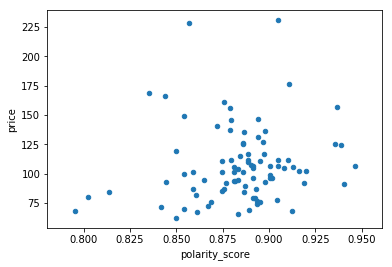

In [54]:
neigh_polarity.plot.scatter(x='polarity_score',y='price')

In [55]:
neigh_polarity.corr()

,polarity_score,price
polarity_score,1.000000,0.119034
price,0.119034,1.000000


## Findings :

1. On looking at the charts and top neighbourhoods for price and polarity (Score for review), None of the top neighbourhoods appear at the top of the polarity list
2. It is also not clear that neighbourhoods with lower polarity scores do not appear at the bottom of the price index charts.
3. Hence, we can conclude that Price is not significantly afftecting the review of a listing in a neighbourhood

## Question 3 - Predict Price of a listing

In [58]:
listingsdf['price'].isnull().sum()

0

In [59]:
# Drop columns that are less likely to have an impact on price
df_list = listingsdf.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 65)

In [60]:
# Find columns with all missing values if any 
df_list.columns[df_list.isnull().all()].tolist()

['license']

In [61]:

# Drop license column
df_list = df_list.drop('license', axis=1)
df_list.shape

(3818, 64)

In [62]:
# Review all the numerical columns and assess missing values

num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


### FINDINGS

bathrooms - There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 1 for Nan values

bedrooms - We will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [63]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(1)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Drop square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)

In [64]:
# Review all the categorical columns and assess missing values

cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [65]:
# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    df_list[t] = df_list[t].apply(set_bool_text)

In [66]:
# Function to set all t/f fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    df_list[t] = df_list[t].apply(set_bool_tf)

In [67]:
# Assign N/A to applicable host fields
df_list['host_response_time'] = df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate'] = df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate'] = df_list['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list['host_response_rate'] = df_list['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_list['host_response_rate'] = df_list['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_list = df_list.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city'] = df_list['city'].str.lower()
df_list['city'] = df_list['city'].str.strip()
df_list['state'] = df_list['state'].str.lower()

In [71]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in listingsdf.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3667),
 ('Heating', 3627),
 ('Kitchen', 3423),
 ('Smoke Detector', 3281),
 ('Essentials', 3237),
 ('Dryer', 2997),
 ('Washer', 2992),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2167),
 ('Family/Kid Friendly', 1963),
 ('First Aid Kit', 1680),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 886),
 ('Pets live on this property', 883),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 509),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 51),
 ('


### FINDINGS

Based on the above, I decided to take those amenities that are present more than 2000 times (about 52% compared to entire dataset), which is below.

('Wireless Internet', 3666), ('Heating', 3626), ('Kitchen', 3422), ('Smoke Detector', 3280), ('Essentials', 3237), ('Dryer', 2996), ('Washer', 2991), ('Internet', 2811), ('Shampoo', 2670), ('TV', 2574), ('Carbon Monoxide Detector', 2485), ('Fire Extinguisher', 2196), ('Free Parking on Premises', 2166),

In [72]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [73]:
# Drop the original amenities field
df_list = df_list.drop('amenities', axis = 1)

In [74]:

# Review the remaining object columns
df_list.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [75]:
cat_fields = df_list.select_dtypes(include=['object']).columns

df_list = pd.get_dummies(df_list, columns=cat_fields)
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [76]:
# Build out X and y, y to be price column and X to be all the other columns
y = df_list['price']
X = df_list.drop(['price'], axis=1)

In [77]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [84]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.6119727073658792.  The rsquared score on the test data was 0.6125553452218641.


In [90]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.sort_values('abs_coefs',ascending=False).head(10)

,est_int,coefs,abs_coefs
4,neighborhood_overview,2.529521e+16,2.529521e+16
15,host_neighbourhood,1.919355e+16,1.919355e+16
9,host_since,-1.858545e+16,1.858545e+16
10,host_location,-1.669624e+16,1.669624e+16
1,summary,1.591009e+16,1.591009e+16
3,description,-1.553475e+16,1.553475e+16
8,host_name,1.409822e+16,1.409822e+16
14,host_picture_url,1.016510e+16,1.016510e+16
5,notes,8.520817e+15,8.520817e+15
160,city_西雅图,7.916478e+15,7.916478e+15


## Findings

The R2 score of 0,61 is obtained on the regression and top factors for predicting the price is shown above